# Cleaning and Analyzing Employee Exit Survey Data

In this work, I will be cleaning and analyzing the exit survey data for employees from the [Department of Education, Training, and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)). The data is available [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

The key questions that I'll be trying to answer here are as follows;
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## 1. Read Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## 2. Initial Exploration of Data

### 2.1 Dete Survey

These are the columns with the most missing values. The rest of the columns have a fairly less number of missing values
* Torres Strait
* South Sea
* Aboriginal
* Disability
* NESB
* Business Unit
* Classification

Another observation is that there are records with the value "Not Stated" which effectively mean they are NaN, but in our analyses they don't show as NaN. We will need to reread the csv and explicitly make these values be read as NaN

In [3]:
len(dete_survey)

822

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Performance of supervisor                9
Initiative 

### 2.1 Tafe Survey

There weren't many columsn with a large propotion of missing values as we observed in the data from dete_survey above. The column with the most missing value had only 58 missning values out of 702

In [7]:
len(tafe_survey)

702

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
WorkArea                                                           0
Institute                                                          0
Record ID                                                          0
Length: 72, dtype: int64

## 3. Drop Values We won't Be Using

### 3.1 Drop NaNs

In [11]:
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])
tafe_survey = pd.read_csv('tafe_survey.csv', na_values=['Not Stated'])

In [12]:
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Region                                 105
Role Start Date                         98
Opportunities for promotion             87
Career Aspirations                      76
DETE Start Date                         73
Wellness programs                       56
Coach                                   55
Further PD                              54
Cease Date                              34
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age        

In [13]:
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
WorkArea                                                           0
Institute                                                          0
Record ID                                                          0
Length: 72, dtype: int64

In [14]:
# dete_survey.dropna(thresh=(len(dete_survey)*3/4), axis=1, inplace=True)
# tafe_survey.dropna(thresh=(len(tafe_survey)*3/4), axis=1, inplace=True)

In [15]:
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Region                                 105
Role Start Date                         98
Opportunities for promotion             87
Career Aspirations                      76
DETE Start Date                         73
Wellness programs                       56
Coach                                   55
Further PD                              54
Cease Date                              34
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age        

In [16]:
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
WorkArea                                                           0
Institute                                                          0
Record ID                                                          0
Length: 72, dtype: int64

### 3.2 Drop Columns We Don't Need

Recall we are trying to understand why employees quit. With that in mind, we have figured some columns won't help us answer those questions. We are dropping such columns here

In [17]:
dete_survey = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [18]:
tafe_survey = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## 3. Clean Column Names

Many columns have different names but contain similar information in the two survey data; tafe survey and dete survey. Here are examples

| dete_survey | tafe_survey | Definition |
|:--:|:--:|:--:|
|ID| Record I | An id used to identify the participant of the survey |
|SeparationType | Reason for ceasing employment | The reason why the participant's employment ended |
|Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
|DETE Start Date | | The year the participant began employment with DETE |
|Age | CurrentAge. Current Age | The age of the participant |
|Gender | Gender. What is your Gender ?| The gender of the participant |

We want to merge dete_survey and tafe_survey datasets. The first thing to to modify is the column names. We want the column names to be consistent between the two datasets so we won't introduce unneccessary NaNs in the merged data

In [19]:
dete_survey_updated = dete_survey
dete_survey_updated.columns = (dete_survey.columns
                       .str.lower()
                       .str.replace(" ", "_")
                       .str.strip())

dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [20]:
tafe_survey_updated = tafe_survey
tafe_survey_updated.rename(columns={
'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'   
}, inplace=True)

# tafe_survey_updated.columns = (tafe_survey.columns
#                        .str.lower()
#                        .str.replace(" ", "_")
#                        .str.strip())

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## 4. Filter Data

We want to focus on those who resigned only. There are more reasons why people quit, including their contracts expiring, or retiring but for now we won't be focusing on them

In [21]:
dete_resignations = (dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')]).copy()
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [22]:
tafe_resignations = (tafe_survey_updated[tafe_survey_updated['separationtype'] =='Resignation']).copy()           
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## 5. Verify Data

Here, we are trying to ensure that the data make sense to the best of our knowledge. For instance, we know that that each of the employees have their cease date which is the date they stopped working and their start date which is the date they started working. Thus we aren't expecting a the cease date to be smaller than the start date. That's the kind of stuff we are examining at this part

Our analysis here show that there aren't source of concern regarding year

In [23]:
# Check for situations where start date is bigger than cease date

dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)
dete_resignations[dete_resignations['cease_date'] < dete_resignations['dete_start_date']]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


In [24]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

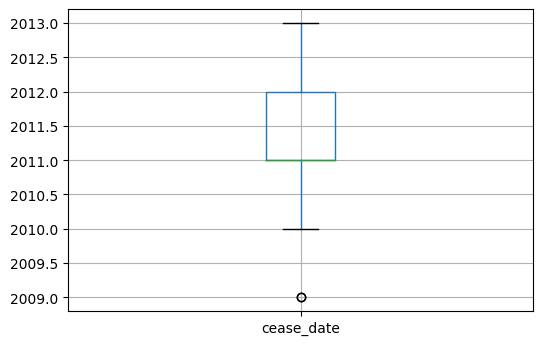

In [25]:
tafe_resignations.boxplot(column='cease_date')

## 6. Create New Column

I will be creating a column named "year_of_service" for dete_survey dataset, which corresponds to the column with the same name in tafe_survey dataset. This column shows the number of years spent by an employee in a company. It will be useful in determining whether there is a difference in the reasno for resignation among employees who have spent many years in the company versus those who have only been there for a short period

In [26]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].describe()

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

In [27]:
dete_resignations['institute_service'].describe()

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

## 7. Identify Dissatisfied Employees

I will be using the following columns to identify dissatisfied employees in the two datasets

**tafe_survey_updated**
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

**dete_survey_updated**
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If he employee indicated that any of these factors above was a reason taht contributed to them resigning, I wil mark them as *dissatisfied*. I will create a pd.Series that will show this information

In [28]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [30]:
def update_vals(val):
    if(val == '-'):
        return False
    elif(pd.isnull(val)):
        return np.nan
    else:
        return True

In [31]:
dete_dissatisfaction_columns = [
    "job_dissatisfaction",
    "dissatisfaction_with_the_department",
    "physical_work_environment",
    "lack_of_recognition",
    "lack_of_job_security",
    "work_location",
    "employment_conditions",
    "work_life_balance",
    "workload"]

dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfaction_columns].applymap(update_vals).any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,True
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,26-30,NaN,NaN,NaN,NaN,NaN,3.0,True
815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,21-25,NaN,NaN,NaN,NaN,NaN,2.0,True
816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0,True
819,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True


In [32]:
tafe_dissatisfaction_columns = ['Contributing Factors. Dissatisfaction',
                                'Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisfaction_columns].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6,False
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2,False
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2,False


## 8. Merge dete_survey and tafe_survey Datasets

We want to have enough data to get a more reliable information on why employees resign. Thus we combine the two datasets. We also do away with columns that have more than 500 of the records with no values since such columns are likely not to help us achieve what we want

In [33]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [34]:
# Combine the two datasets

combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [35]:
# Drop columns with less than 500 non null values

combined_updated = combined.dropna(thresh=500, axis=1)

## 9. Clean the Service Column

In [36]:
def career_stage(val):
    try:
        if(type(val) == str):
            val = pd.Series([float(i) for i in val.split('-')]).mean()
            
        val = float(val)
        if(val < 3):
            return 'New'
        elif(val < 6):
            return 'Experienced'
        elif(val < 10):
            return 'Established'
        else:
            return 'Veteran'
    except:
        if(val == 'Less than 1 year'):
            return 'New'
        elif(val == 'More than 20 years'):
            return 'Veteran'

In [37]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)
combined_updated['service_cat'].value_counts()

<ipython-input-37-c59739546cef>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Veteran        230
New            193
Experienced    155
Established     73
Name: service_cat, dtype: int64

## 10. Perform Initial Analysis

The findings from the analyses performed here show that the more years people spend on the company the more likely they are to be dissatisfied with the working environment. The most dissatisfied people were the the "established" employees. These are employees who have spent between 7 and 10 years in the company. The second most dissatisfied group was Veterans. These are employees who have spent more than 10 years with the company. New employees (less than one year in the company) were the least dissatisfied

In [38]:
combined_updated['dissatisfied'].value_counts()

True     402
False    241
Name: dissatisfied, dtype: int64

In [39]:
# Fill na with most frequent value

most_frequent_value = combined_updated['dissatisfied'].value_counts().sort_values(ascending=False).index[0]
combined_updated['dissatisfied'].fillna(most_frequent_value, inplace=True)

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
combined_updated['dissatisfied'].value_counts()

True     410
False    241
Name: dissatisfied, dtype: int64

In [41]:
# See the % dissatisfied employees for each service Cat

dissatisfaction_rates = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dissatisfaction_rates

,dissatisfied
service_cat,
Established,0.808219
Experienced,0.535484
New,0.476684
Veteran,0.765217


Text(0.5, 1.0, 'Established Employees are the Most Dissatisfied')

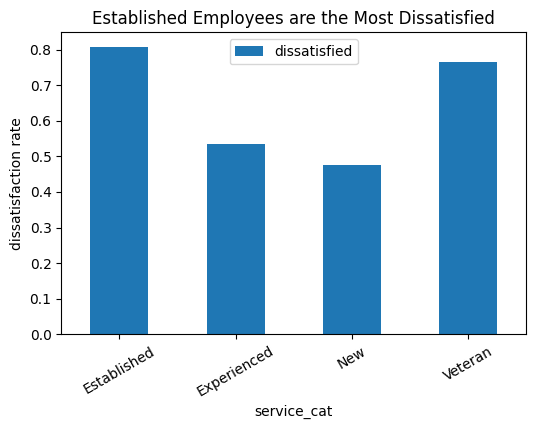

In [42]:
dissatisfaction_rates.plot(kind='bar', rot=30)
plt.ylabel('dissatisfaction rate')
plt.title("Established Employees are the Most Dissatisfied")